<a href="https://colab.research.google.com/github/KamilShape/credit_risk_analysis/blob/main/credit_risk_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1. Introduction and data load.

###1.1 Libraries

In [163]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [164]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


###1.2 Database analysis

Database link: https://www.kaggle.com/datasets/ranadeep/credit-risk-dataset

In [165]:
loan = pd.read_csv("/content/drive/MyDrive/loan.csv")

<ipython-input-165-09ca7cbc1256>:1: DtypeWarning: Columns (19,55) have mixed types. Specify dtype option on import or set low_memory=False.
  loan = pd.read_csv("/content/drive/MyDrive/loan.csv")


In [166]:
loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,1077501,1296599,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,B2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1077430,1314167,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,C4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1077175,1313524,2400.0,2400.0,2400.0,36 months,15.96,84.33,C,C5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1076863,1277178,10000.0,10000.0,10000.0,36 months,13.49,339.31,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1075358,1311748,3000.0,3000.0,3000.0,60 months,12.69,67.79,B,B5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# 2. Data preprocessing

### 2.1 Selecting relevant columns

In [167]:
loan2 = loan[['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'home_ownership', 'emp_length', 'annual_inc', 'purpose', 'dti', 'delinq_2yrs', 'application_type', 'annual_inc_joint', 'dti_joint', 'verification_status', 'loan_status']]

In [168]:
loan2

,loan_amnt,term,int_rate,installment,grade,home_ownership,emp_length,annual_inc,purpose,dti,delinq_2yrs,application_type,annual_inc_joint,dti_joint,verification_status,loan_status
0,5000.0,36 months,10.65,162.87,B,RENT,10+ years,24000.0,credit_card,27.65,0.0,INDIVIDUAL,NaN,NaN,Verified,Fully Paid
1,2500.0,60 months,15.27,59.83,C,RENT,< 1 year,30000.0,car,1.00,0.0,INDIVIDUAL,NaN,NaN,Source Verified,Charged Off
2,2400.0,36 months,15.96,84.33,C,RENT,10+ years,12252.0,small_business,8.72,0.0,INDIVIDUAL,NaN,NaN,Not Verified,Fully Paid
3,10000.0,36 months,13.49,339.31,C,RENT,10+ years,49200.0,other,20.00,0.0,INDIVIDUAL,NaN,NaN,Source Verified,Fully Paid
4,3000.0,60 months,12.69,67.79,B,RENT,1 year,80000.0,other,17.94,0.0,INDIVIDUAL,NaN,NaN,Source Verified,Current
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
887374,10000.0,36 months,11.99,332.10,B,RENT,8 years,31000.0,debt_consolidation,28.69,0.0,INDIVIDUAL,NaN,NaN,Verified,Current
887375,24000.0,36 months,11.99,797.03,B,MORTGAGE,10+ years,79000.0,home_improvement,3.90,0.0,INDIVIDUAL,NaN,NaN,Verified,Current
887376,13000.0,60 months,15.99,316.07,D,RENT,5 years,35000.0,debt_consolidation,30.90,0.0,INDIVIDUAL,NaN,NaN,Verified,Current
887377,12000.0,60 months,19.99,317.86,E,RENT,1 year,64400.0,debt_consolidation,27.19,1.0,INDIVIDUAL,NaN,NaN,Source Verified,Current


### 2.2 Removing NaN values

In [169]:
loan2.fillna(0, inplace = True)

<ipython-input-169-81e18bd3abfd>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loan2.fillna(0, inplace = True)


In [170]:
#checking null values
np.sum(loan2.isnull().any(axis=1))

0

### 2.3 Spliting loan_status into 3 categories
* 1 - low risk (Issued, Current, Does not meet the credit policy: Status:Fully Paid, Fully Paid)
* 2 - medium risk (In Grace Period, Late (16-30 days), Late (31-120 days))
* 3 - high risk (Charged Off ,Does not meet the credit policy. Status:Charged Off, Default)






In [171]:
loan2.loc[loan2['loan_status'].isin(['Issued','Current','Does not meet the credit policy. Status:Fully Paid', 'Fully Paid']), 'loan_risk'] = 'Low'
loan2.loc[loan2['loan_status'].isin(['In Grace Period', 'Late (16-30 days)', 'Late (31-120 days)']), 'loan_risk'] = 'Medium'
loan2.loc[loan2['loan_status'].isin(['Charged Off' , 'Does not meet the credit policy. Status:Charged Off', 'Default']), 'loan_risk'] = 'High'

<ipython-input-171-8fe3149f6cc8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loan2.loc[loan2['loan_status'].isin(['Issued','Current','Does not meet the credit policy. Status:Fully Paid', 'Fully Paid']), 'loan_risk'] = 'Low'


#3. Data visualisation

### 3.1 Data Visualisation for loan risk

In [201]:
avg_loan_amnt_by_loan_risk = pd.DataFrame(loan2.groupby('loan_risk')['loan_amnt'].mean().reset_index())
avg_loan_amnt_by_loan_risk

,loan_risk,loan_amnt
0,High,14491.714131
1,Low,14746.769651
2,Medium,15716.226919


In [173]:
avg_rate_by_loan_risk = pd.DataFrame(loan2.groupby('loan_risk')['int_rate'].mean().reset_index())

In [204]:
avg_dti_by_loan_risk = pd.DataFrame(loan2.groupby('loan_risk')['dti'].mean().reset_index())

In [175]:
avg_installment_by_loan_risk = pd.DataFrame(loan2.groupby('loan_risk')['installment'].mean().reset_index())

In [ ]:
#cleaning emp_length columns
loan2['emp_length'] = loan2['emp_length'].str.replace('year', "")
loan2['emp_length'] = loan2['emp_length'].str.replace('s', "")
loan2['emp_length'] = loan2['emp_length'].str.replace('< 1', "0.5")
loan2['emp_length'] = loan2['emp_length'].str.replace('+', "")
loan2['emp_length'] = loan2['emp_length'].str.replace(' ', "")
loan2['emp_length'] = loan2['emp_length'].astype('float')

In [177]:
avg_emp_length_by_loan_risk = pd.DataFrame(loan2.groupby('loan_risk')['emp_length'].mean().reset_index())

In [178]:
avg_emp_length_by_loan_risk['emp_length'] = avg_emp_length_by_loan_risk['emp_length'].round()

In [219]:
new_frame = pd.merge(pd.merge(avg_rate_by_loan_risk, avg_dti_by_loan_risk, on='loan_risk'), avg_installment_by_loan_risk,  on='loan_risk',  how='inner')

In [179]:
#counting values by loan term
months_36 = loan2[loan2['term'] == ' 36 months']
months_60 = loan2[loan2['term'] == ' 60 months']

In [180]:
#loan_int_range_df = pd.DataFrame(loan2['int_range'].value_counts()).reset_index().sort_values(by='index')

In [181]:
#Interest Rate on the loan
# ax[0,0].bar(loan_int_range_df['index'], loan_int_range_df['int_range'], color='lightsalmon')
# ax[0,0].set_title('Interest Rate on the loan (Min value: 5.32%, Max value: 28.99%)')
# ax[0,0].set_xlabel('Rates range [%]')

In [182]:
loan2['int_range'] = pd.cut(loan2['int_rate'], bins = [5,10.01,14.01,18.01,22.01,26.01,29.01], labels = ['5-10','10-14','14-18','18-22','22-26','26-29'])

<ipython-input-182-5c15275ff2c6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loan2['int_range'] = pd.cut(loan2['int_rate'], bins = [5,10.01,14.01,18.01,22.01,26.01,29.01], labels = ['5-10','10-14','14-18','18-22','22-26','26-29'])


<ipython-input-203-16cd1d7a5917>:26: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[1,1].set_xticklabels([' ',' ','Low',' ','Medium',' ','High'])


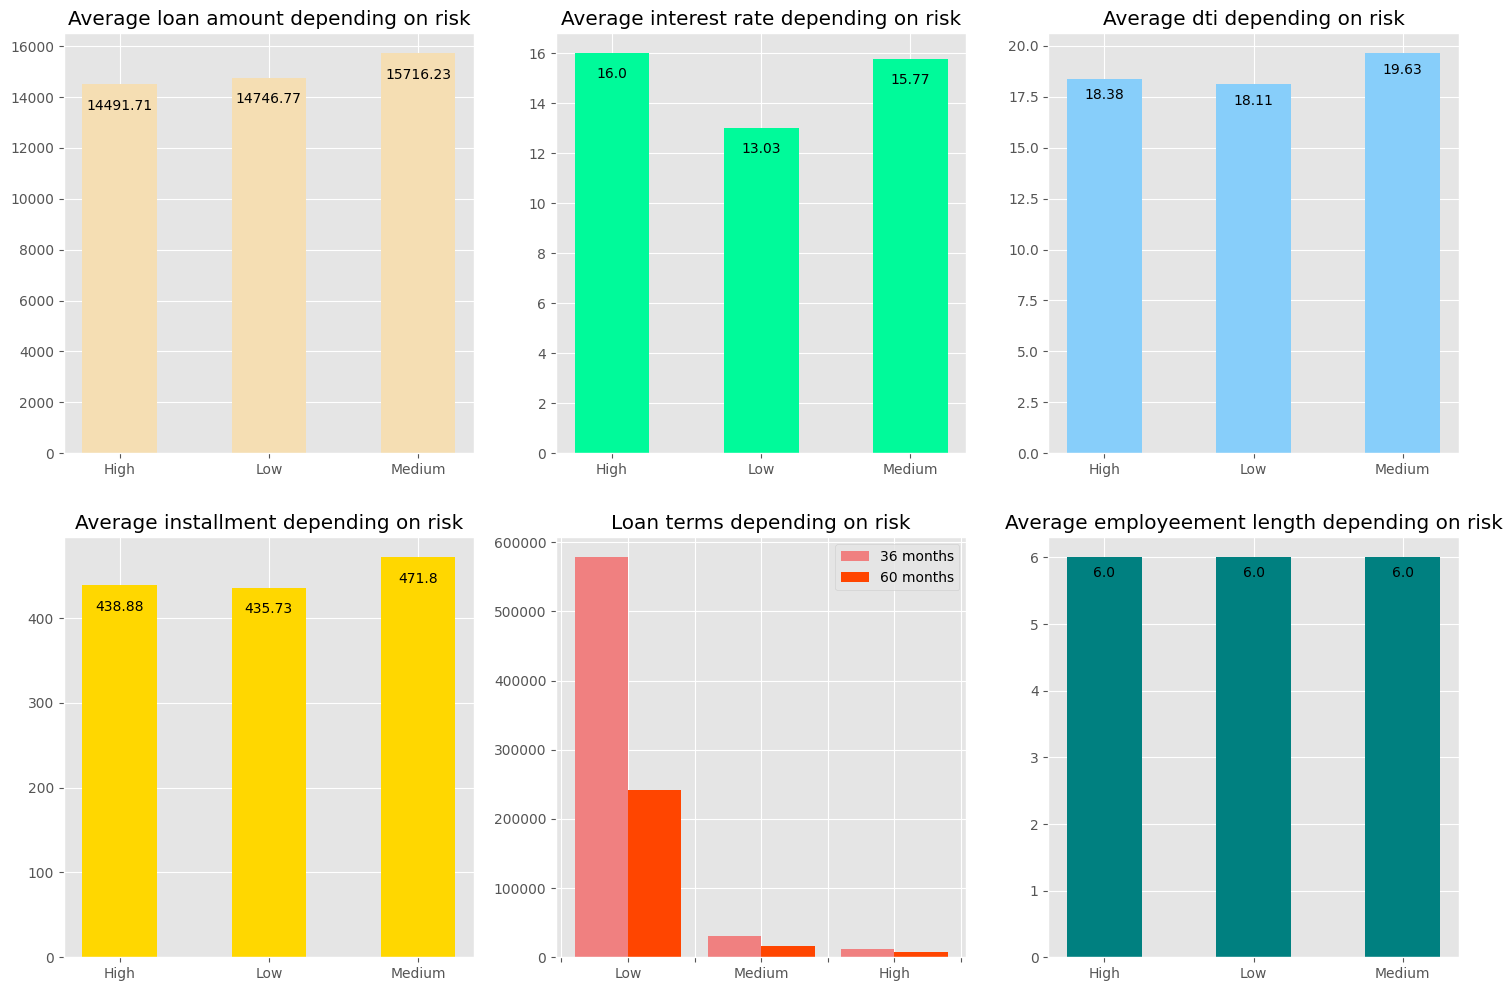

In [203]:
plt.style.use('ggplot')
fig, ax = plt.subplots(2,3, figsize = (18,12))

#Average loan amount depending on risk
ax[0,0].bar(avg_loan_amnt_by_loan_risk['loan_risk'], avg_loan_amnt_by_loan_risk['loan_amnt'], color='wheat', width=0.5)
ax[0,0].set_title('Average loan amount depending on risk')

#Average interest rate depending on risk
ax[0,1].bar(avg_rate_by_loan_risk['loan_risk'], avg_rate_by_loan_risk['int_rate'], color='mediumspringgreen', width=0.5)
ax[0,1].set_title('Average interest rate depending on risk')

#Average dti depending on risk
ax[0,2].bar(avg_dti_by_loan_risk['loan_risk'], avg_dti_by_loan_risk['dti'], color='lightskyblue', width=0.5)
ax[0,2].set_title('Average dti depending on risk')

#Average installment depending on risk
ax[1,0].bar(avg_installment_by_loan_risk['loan_risk'], avg_installment_by_loan_risk['installment'], color='gold', width=0.5)
ax[1,0].set_title('Average installment depending on risk')

#Terms depending on risk
X = ['Low', 'Medium', 'High']
X_axis = np.arange(len(X))
ax[1,1].bar(X_axis-0.2,months_36['loan_risk'].value_counts().values,0.4,label= '36 months', color='lightcoral')
ax[1,1].bar(X_axis+0.2,months_60['loan_risk'].value_counts().values,0.4,label= '60 months', color='orangered')
ax[1,1].set_title('Loan terms depending on risk')
ax[1,1].set_xticklabels([' ',' ','Low',' ','Medium',' ','High'])
ax[1,1].legend()
#Average employeement depending on risk
ax[1,2].bar(avg_emp_length_by_loan_risk['loan_risk'], avg_emp_length_by_loan_risk['emp_length'], color='teal', width=0.5)
ax[1,2].set_title('Average employeement length depending on risk')

def add_text(chart,x,y,move):
  for i in range(0, len(x)):
    chart.text(x[i], y[i]-move, round(y[i], 2), horizontalalignment='center')

add_text(ax[0,0], avg_loan_amnt_by_loan_risk['loan_risk'], avg_loan_amnt_by_loan_risk['loan_amnt'], 1000)
add_text(ax[0,1], avg_rate_by_loan_risk['loan_risk'], avg_rate_by_loan_risk['int_rate'], 1)
add_text(ax[0,2], avg_dti_by_loan_risk['loan_risk'], avg_dti_by_loan_risk['dti'], 1)
add_text(ax[1,0], avg_installment_by_loan_risk['loan_risk'], avg_installment_by_loan_risk['installment'], 30)
add_text(ax[1,2], avg_emp_length_by_loan_risk['loan_risk'], avg_emp_length_by_loan_risk['emp_length'], 0.3)